

> Logistic Regression Implementation [ From Scratch ] Without Library 🔝

> Classification by Regularizationn


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../input/predict-loan-approval-problem/train_u6lujuX_CVtuZ9i.csv')
print('dataset :\n',dataset.head(5))

dataset :
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2        

In [3]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)

In [4]:
import statistics
dataset['Gender'] = dataset['Gender'].replace(np.nan,statistics.mode(dataset["Gender"]))
dataset['Married'] = dataset['Married'].replace(np.nan,statistics.mode(dataset["Married"]))
dataset['Dependents'] = dataset['Dependents'].replace(np.nan,statistics.mode(dataset["Dependents"]))
dataset['Self_Employed'] = dataset['Self_Employed'].replace(np.nan,statistics.mode(dataset["Self_Employed"]))
dataset['Credit_History'] = dataset['Credit_History'].replace(np.nan,statistics.mode(dataset["Credit_History"]))

dataset['LoanAmount'] = dataset['LoanAmount'].replace(np.nan,dataset['LoanAmount'].median())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].replace(np.nan,dataset['Loan_Amount_Term'].median())

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0}) 
dataset['Married'] = dataset['Married'].map({'Yes':1,'No':0}) 
dataset['Education'] = dataset['Education'].map({'Graduate':1,'Not Graduate':0}) 
dataset['Self_Employed'] = dataset['Self_Employed'].map({'Yes':1,'No':0}) 
dataset['Loan_Status'] = dataset['Loan_Status'].map({'Y':1,'N':0}) 
dataset['Property_Area'] = dataset['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2}) 

dataset['Dependents'] = le.fit_transform(dataset['Dependents'])

In [6]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Dependents'], prefix='Dependents')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Property_Area'], prefix='Property_Area')], axis=1)

In [7]:
dataset.drop(['Dependents','Property_Area'],axis=1,inplace=True)

In [8]:
y = dataset['Loan_Status'].values
dataset = dataset.drop('Loan_Status',axis=1,inplace=False)
X = dataset.values

In [9]:
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis = 1)

In [10]:
y=np.reshape(y,(y.shape[0],1))
theta2 = np.zeros(X.shape[1])

In [11]:
print(X.shape)
print(y.shape)
print(theta2.shape)

(614, 17)
(614, 1)
(17,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,1:] = sc.fit_transform(X[:,1:])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

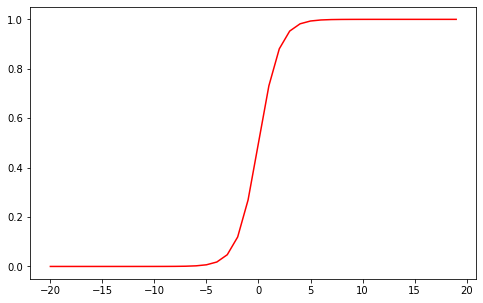

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
n = np.arange(-20,20,step=1)
plt.figure(figsize=(8,5))
plt.plot(n,sigmoid(n),color='red')

In [15]:
#y_train=np.reshape(y_train,(y_train.shape[0],1))

In [16]:
def costReg(theta2, X2, y2,lr):
    theta2 = np.matrix(theta2)
    X2 = np.matrix(X2)
    y2 = np.matrix(y2)
    first = np.multiply(-y2, np.log(sigmoid(X2 * theta2.T)))
    second = np.multiply((1 - y2), np.log(1 - sigmoid(X2 * theta2.T)))
    total_equation=np.sum(first - second) / (len(X2))
    reg = (lr / 2 * len(X2)) * np.sum(np.power(theta2[:,1:theta2.shape[1]], 2))
    final = total_equation + reg
    return final 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


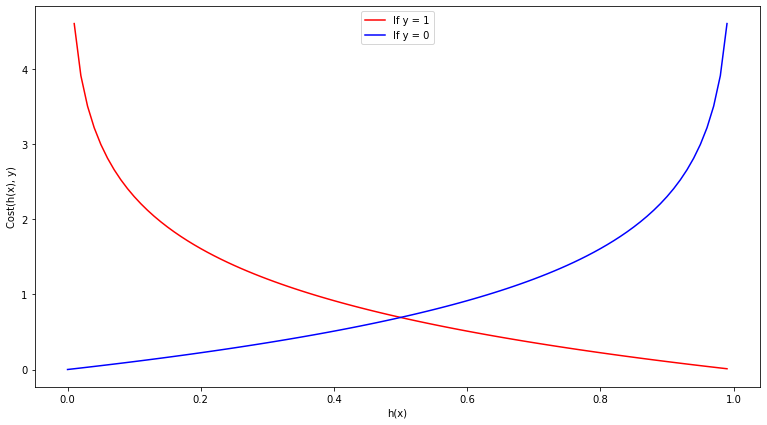

In [17]:
# Graphically, the Cost function looks like so:
nums = np.arange(0, 1, step=.01)

fig, ax = plt.subplots(figsize=(13,7))

ax.plot(nums, np.multiply(1, -np.log(nums)), c='r', label='If y = 1')
ax.plot(nums, np.multiply(1, -np.log(1-nums)), c='b', label='If y = 0')
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')

In [18]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)

        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])

    return grad

learningRate = 0.000001


rcost = costReg(theta2, X_train, y_train, learningRate)
print()
print('regularized cost = ' , rcost)
print()




regularized cost =  0.6931471805599453



In [19]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,args=(X_train, y_train, learningRate))
print( 'result = ' , result )
print()
Cost_After_Optimize = costReg(result[0], X_train, y_train,learningRate)
print()
print('Cost_Function After Optimize = ' , Cost_After_Optimize)
print()

result =  (array([ 0.76733375,  0.0253497 ,  0.32441261,  0.17532599, -0.07778197,
        0.15315288, -0.19534221, -0.33807074, -0.08279455,  1.3095084 ,
       -0.08792999, -0.09763366,  0.14903085,  0.0923399 , -0.12022104,
       -0.11487792,  0.23304775]), 73, 4)


Cost_Function After Optimize =  0.46510035381389647



  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   1.12916982E-01
    1    4  4.772844752869477E-01   3.45489092E-03
    2    7  4.662998597760766E-01   1.69795225E-04
tnc: fscale = 76.7427
    3   11  4.651126932836220E-01   5.20476843E-06
    4   15  4.651003878805167E-01   1.26278857E-07
tnc: fscale = 2814.07
    5   37  4.651003538138964E-01   7.13157093E-08
    5   72  4.651003538138964E-01   7.13157093E-08
tnc: Linear search failed


In [20]:
print('Number of iterations :',result[1])

Number of iterations : 73


In [21]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_test)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]
print('Accuracy',np.sum(correct)/ len(correct) *100) 

Accuracy 84.32432432432432


In [22]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,predictions)
print(cm)

[[ 26  26]
 [  3 130]]


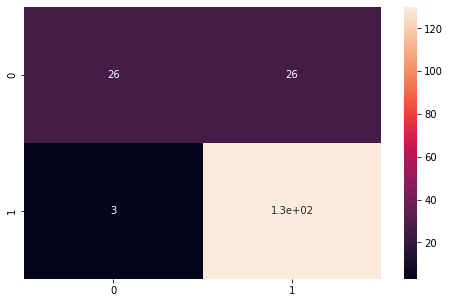

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.show()

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        52
           1       0.83      0.98      0.90       133

    accuracy                           0.84       185
   macro avg       0.86      0.74      0.77       185
weighted avg       0.85      0.84      0.83       185



tpr_LR:  [0.  0.5 1. ]
fpr_LR:  [0.         0.97744361 1.        ]
threshold_LR: [2 1 0]
Area Under The Curve : 0.7387218045112782


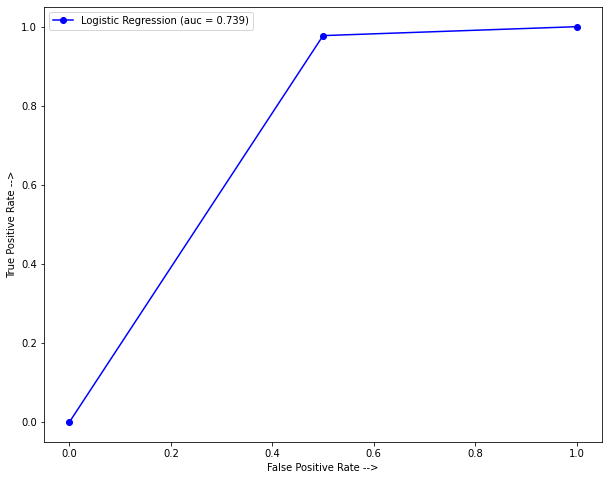

In [25]:
from sklearn.metrics import roc_curve,auc
tpr_LR,fpr_LR,threshold_LR = roc_curve(y_test,predictions)
print('tpr_LR: ',tpr_LR)
print('fpr_LR: ',fpr_LR)
print('threshold_LR:',threshold_LR)

auc_LR = auc(tpr_LR,fpr_LR)
print('Area Under The Curve :',auc_LR)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(10,8))
plt.plot(tpr_LR,fpr_LR,marker='o',color='blue',label='Logistic Regression (auc = %0.3f)'% auc_LR)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()
plt.show()